# Python Solution for Programming Exercise 1: Linear Regression
## Part 1 Simple Octave/MATLAB function

In [1]:
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.eye(5)
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## Part 2 Linear regression with one variable
### Plotting the Data

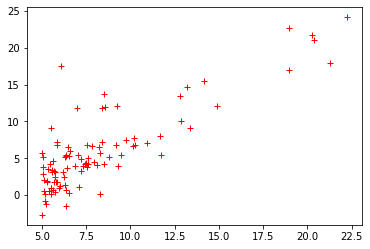

In [3]:
data1 = np.loadtxt("ex1data1.txt", delimiter=',')
X = data1[:,0]
Y = data1[:,1]
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
plt.plot(X,Y,"r+")

### Gradient Descent

In [4]:
def computeSquareCostFunction(t0, t1):
    ans = 0
    for i in range(0, len(X)):
        ans += (t0 + t1 * X[i][0] - Y[i][0]) ** 2
    return ans / (2 * len(X))
print(computeSquareCostFunction(0,0))

32.072733877455654


theta_0: -3.6302914394043597 theta_1: 1.166362350335582


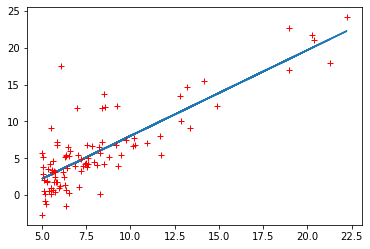

In [5]:
theta_0 = 0
theta_1 = 0
square_cost = 0
iterations = 1500
alpha = 0.01
m = len(X)

# Gradient descent
while iterations > 0:
    iterations -= 1
    partial_derivative_theta0 = ((theta_0 + theta_1 * X)-Y).sum()/m
    partial_derivative_theta1 = (((theta_0 + theta_1 * X)-Y)*X).sum()/m
    theta_0 = theta_0 - alpha * partial_derivative_theta0
    theta_1 = theta_1 - alpha * partial_derivative_theta1
    
print("theta_0: " + str(theta_0) + " theta_1: " + str(theta_1))

pred_Y = theta_0 + theta_1 * X
plt.plot(X,pred_Y)
plt.plot(X,Y,"r+")

In [6]:
# make predictions on proifts in areas of 35,000 and 70,000 people.
print("predictions for 35,000 people: " + str(theta_0 + theta_1  * 3.5))
print("predictions for 70,000 people: " + str(theta_0 + theta_1  * 7))

predictions for 35,000 people: 0.45197678677017716
predictions for 70,000 people: 4.534245012944714


### Visualizing J($\theta$)

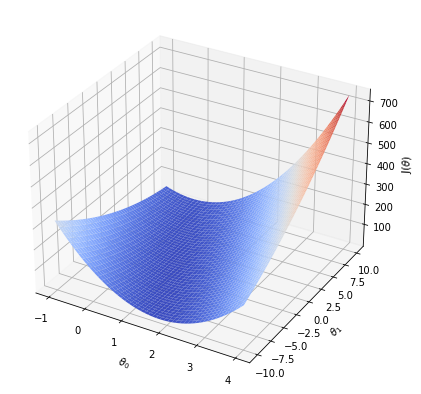

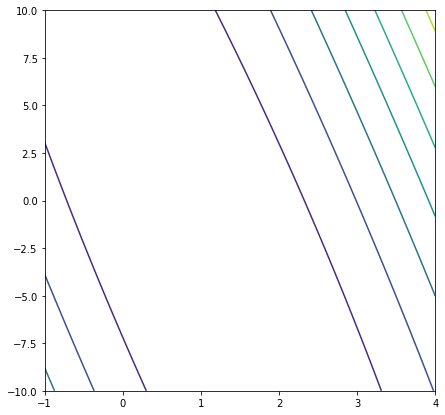

In [7]:
fig_theta_0 = np.linspace(-10,10,len(X))
fig_theta_1 = np.linspace(-1,4,len(X))
fig_theta_0, fig_theta_1 = np.meshgrid(fig_theta_0, fig_theta_1)
fig_J_theta = np.zeros(fig_theta_0.shape)
for i in range(0,fig_theta_0.shape[0]):
    for j in range(0,fig_theta_0.shape[1]):
        fig_J_theta[i][j] = computeSquareCostFunction(fig_theta_0[i][j],fig_theta_1[i][j])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(fig_theta_1, fig_theta_0, fig_J_theta, cmap='coolwarm')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')

plt.figure(figsize=(7, 7))
plt.contour(fig_theta_1, fig_theta_0, fig_J_theta)

## Optional Exercises
## Part 3 Linear regression with multiple variables
### Feature Normalization

In [8]:
data2 = np.loadtxt("ex1data2.txt", delimiter=',')
X = data2[:,:2]
Y = data2[:,2]
# Normalization
X0_mean = X[:,0].mean()
X0_std = X[:,0].std()
X1_mean = X[:,1].mean()
X1_std = X[:,1].std()
X[:,0] = (X[:,0] - X0_mean)/X0_std
X[:,1] = (X[:,1] - X1_mean)/X1_std
print(X)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

### Gradient Descent

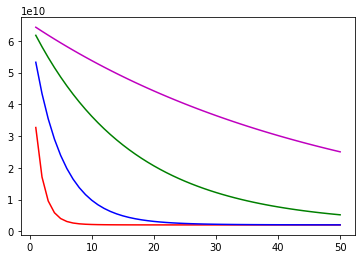

In [9]:
X = np.column_stack((np.ones(len(X)),X))
theta = np.zeros(X.shape[1])
def computeSquareLossMulti():
    m = len(X)
    return (X @ theta - Y).transpose() @ (X @ theta - Y) / (2 * m)

def gradient_descent(alpha,max_it):
    diff = 1
    prev = computeSquareLossMulti()
    while diff >= 0.01 and max_it > 0:
        max_it -= 1
        pred_Y = X @ theta
        m = len(X)
        for i in range(0,len(theta)):
            theta[i] = theta[i] - alpha / m * ((pred_Y - Y) * X[:,i]).sum()
        curr = computeSquareLossMulti()
        diff = abs(curr - prev)
        prev = curr
    return prev

#alpha = 0.3
alpha = 0.3
it_1 = np.zeros(50)
res_1 = np.zeros(50)
theta_1 = np.zeros(3)
for i in range(0,50):
    it_1[i] = i + 1
    theta = np.zeros(3)
    res_1[i] = gradient_descent(alpha,i + 1)

#alpha = 0.1
alpha = 0.1
it_2 = np.zeros(50)
res_2 = np.zeros(50)
theta_2 = np.zeros(3)
for i in range(0,50):
    it_2[i] = i + 1
    theta = np.zeros(3)
    res_2[i] = gradient_descent(alpha,i + 1)

#alpha = 0.03    
alpha = 0.03
it_3 = np.zeros(50)
res_3 = np.zeros(50)
theta_3 = np.zeros(3)
for i in range(0,50):
    it_3[i] = i + 1
    theta = np.zeros(3)
    res_3[i] = gradient_descent(alpha,i + 1)

#alpha = 0.01    
alpha = 0.01
it_4 = np.zeros(50)
res_4 = np.zeros(50)
theta_4 = np.zeros(3)
for i in range(0,50):
    it_4[i] = i + 1
    theta = np.zeros(3)
    res_4[i] = gradient_descent(alpha,i + 1)

plt.plot(it_1,res_1,"r")
plt.plot(it_2,res_2,"b")
plt.plot(it_3,res_3,"g")
plt.plot(it_4,res_4,"m")

Select $\alpha = 0.3$.

In [10]:
theta = np.zeros(X.shape[1])
alpha = 0.3
gradient_descent(alpha,50)
print(theta)

[340412.65345227 109398.90129361  -6529.45967813]


In [11]:
pred_x = np.array([1, (1650 - X0_mean)/X0_std, (3 - X1_mean)/X1_std])
print("Predict the price of a house with 1650 square feet and 3 bedrooms with alpha = 0.3: " + str((pred_x @ theta)))

Predict the price of a house with 1650 square feet and 3 bedrooms with alpha = 0.3: 293092.21273075533


### Normal Equations

In [12]:
theta = np.linalg.pinv((X.transpose() @ X)) @ X.transpose() @ Y
print(theta)
print("Predict the price of a house with 1650 square feet and 3 bedrooms with normal equations: " + str(pred_x @ theta))

[340412.65957447 109447.79646964  -6578.35485416]
Predict the price of a house with 1650 square feet and 3 bedrooms with normal equations: 293081.4643348961
